# **House Sales Analysis in King County, USA**


## Introduction
This project analyzes house sales data from King County, Washington, which includes Seattle and surrounding areas. The dataset consists of houses sold between May 2014 and May 2015. The primary objective is to explore patterns, trends, and relationships between various housing attributes and their impact on price.

## Objectives  
- Understand the structure of the dataset and clean missing or irrelevant data.  
- Analyze key features such as floors, waterfront views, and square footage to see their effect on house prices.  
- Perform regression analysis, including simple linear regression, multiple regression, and polynomial regression.  
- Implement machine learning techniques such as Ridge Regression to improve price prediction models.  



In [ ]:
!pip install pandas numpy matplotlib seaborn scikit-learn requests


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.pipeline import Pipeline

import requests

file_name = "kc_house_data_NaN.csv"
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv"

# Download and save the file locally
response = requests.get(url)
with open(file_name, "wb") as file:
    file.write(response.content)

df = pd.read_csv(file_name)
df.head(5)


,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## **Module 1: Data Overview**
### **Question 1: Display the data types of each column**

In [5]:
df.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

## **Module 2: Data Cleaning**
### **Question 2: Drop columns 'id' and 'Unnamed: 0' and display statistical summary**

In [6]:
df.drop(['id', 'Unnamed: 0'], axis=1, inplace=True)
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## **Module 3: Unique Floor Values**
### **Question 3: Count houses with unique floor values**

In [7]:
df['floors'].value_counts().to_frame()

,floors
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


## **Module 4: Price Outliers Analysis**
### **Question 4: Boxplot for waterfront view vs. price**

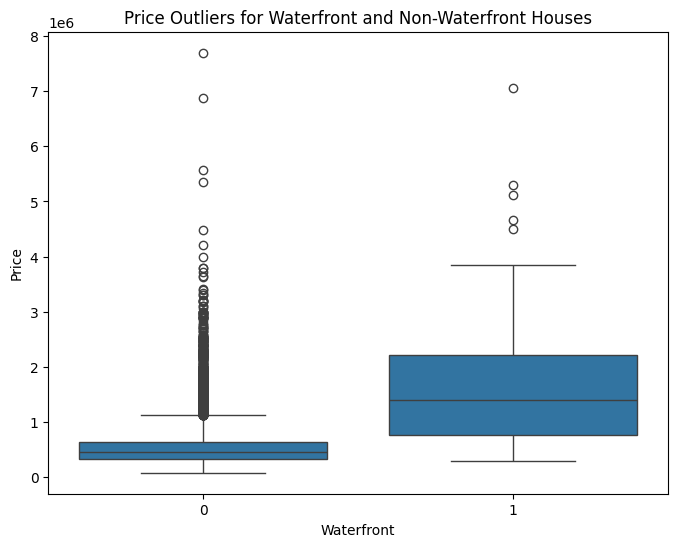

In [8]:
plt.figure(figsize=(8,6))
sns.boxplot(x='waterfront', y='price', data=df)
plt.title('Price Outliers for Waterfront and Non-Waterfront Houses')
plt.xlabel('Waterfront')
plt.ylabel('Price')
plt.show()

## **Module 5: Correlation Analysis**
### **Question 5: Check correlation between sqft_above and price using regplot**

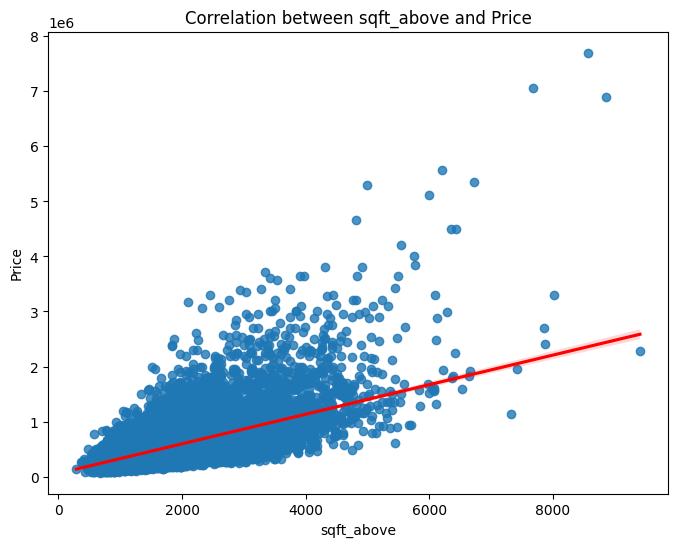

In [9]:
plt.figure(figsize=(8,6))
sns.regplot(x='sqft_above', y='price', data=df, line_kws={'color': 'red'})
plt.title('Correlation between sqft_above and Price')
plt.xlabel('sqft_above')
plt.ylabel('Price')
plt.show()

## **Module 6: Simple Linear Regression**
### **Question 6: Predict price using sqft_living and calculate R^2**

In [10]:
X = df[['sqft_living']]
y = df['price']
model = LinearRegression()
model.fit(X, y)
r2_score = model.score(X, y)
print('R^2 Score:', r2_score)

R^2 Score: 0.4928532179037931


## **Module 7: Multiple Feature Regression**
### **Question 7: Fit a linear model using multiple features**

In [15]:
features = ['sqft_living', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade']
X = df[['long']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)


0.00046769430149007363

## **Module 8: Pipeline for Polynomial Regression**
### **Question 8: Create a pipeline for polynomial regression and calculate R^2**

In [16]:
pipeline = Pipeline([
    ('scale', StandardScaler()),
    ('polynomial', PolynomialFeatures(include_bias=False)),
    ('model', LinearRegression())
])
pipeline.fit(X, y)
r2_score = pipeline.score(X, y)
print('R^2 Score from Polynomial Regression:', r2_score)

R^2 Score from Polynomial Regression: 0.003360798516638175


## **Module 9: Ridge Regression**
### **Question 9: Train Ridge regression and calculate R^2**

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1)
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)
r2_score = ridge_model.score(X_test, y_test)
print('R^2 Score from Ridge Regression:', r2_score)

R^2 Score from Ridge Regression: 0.0005769414289823471


## **Module 10: Polynomial Ridge Regression**
### **Question 10: Apply second-order polynomial transformation and train Ridge regression**

In [37]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train_poly, y_train)
r2_score = ridge_model.score(X_test_poly, y_test)
print('R^2 Score from Polynomial Ridge Regression:', r2_score)

R^2 Score from Polynomial Ridge Regression: 0.0005983775368217925
